# Разведочный анализ данных

Будем работать с датасетом Online Shoppers Purchasing Intention Dataset

# Импорт библиотек и загрузка данных

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy import stats
import time


import warnings
warnings.filterwarnings("ignore")


In [151]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/online_shoppers_intention.csv')

# **Задание 1**

In [152]:
df.shape

(12330, 18)

Таблица состоит из 12,330 строк, в каждой из которых указана информация по объектам, и из 18 столбцов. Таким образом, каждый объект характеризуется 18 признаками.

## Описание данных

* `Administrative` - административный тип страницы, которую посетил клиент
* `Administrative_Duration` - время, проведенное на админ. типе страниц
* `Informational` - информационный тип страницы, которую посетил клиент
* `Informational_Duration` - время, проведенное на инфор. типе страниц
* `ProductRelated` - страница с товарами
* `ProductRelated_Duration` - время, проведенное на странице с товарами
* `BounceRates` - процент посетителей, которые зашли на сайт с конкретной страницы и сразу ушли с тойже странице
* `ExitRates` - процент посетителей, которые ушли с сайта с данной страницы после посещения сайта, от всех просмотров данной страницы
* `PageValues` - выручка от транзакции, разделенная на кол-во посещенных страницы перед совершением покупки
* `SpecialDay` - близость какого-либо праздника по времени
* `Month` - месяц
* `OperatingSystems` - операционная система
* `Browser` - браузер
* `Region` - регион
* `TrafficType` - вид трафика
* `VisitorType` - вид посетителя
* `Weekend`	- выходные
* `Revenue` - выручка


In [107]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Пропущенные значения

In [153]:
isna_sum = df.isna().sum().to_frame()
isna_mean = round(df.isna().mean().to_frame()*100, 2) # в процентах
missing = pd.concat([isna_sum, isna_mean], axis=1)
missing.columns = ['# missing', '% missing']
missing

,# missing,% missing
Administrative,0,0.00
Administrative_Duration,0,0.00
Informational,0,0.00
Informational_Duration,199,1.61
ProductRelated,0,0.00
ProductRelated_Duration,491,3.98
BounceRates,0,0.00
ExitRates,99,0.80
PageValues,0,0.00
SpecialDay,0,0.00


Пропуски присутствуют в трех числовых столбцах: 199 (1,61%) пропусков в Informational_Duration, 491 (3,98%) - в ProductRelated_Duration, 99 (0,8%) - в ExitRates.

Заменим пропущенные значения медианами:

In [154]:
values = {"Informational_Duration": df.Informational_Duration.median(),
          "ProductRelated_Duration": df.ProductRelated_Duration.median(),
          "ExitRates": df.ExitRates.median()
          }
df.fillna(value=values, inplace=True)

In [61]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.164066,31.731468,1166.924308,0.022191,0.042877,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.575938,44.475503,1873.650562,0.048488,0.048393,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,196.500000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1406.182143,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Дупликаты

In [155]:
df.duplicated().sum(), df.duplicated().mean()*100

(112, 0.9083536090835361)

В датасете присутствуют 109 одинаковых строк, что составляет меньше 1% от всех наблюдений. Удаляем дупликаты.

In [156]:
df.drop_duplicates(inplace=True)

df.shape

(12218, 18)

In [157]:
round(df['Region'].value_counts(normalize=True)*100, 2)

,proportion
Region,
1,38.63
3,19.49
4,9.60
2,9.25
6,6.56
7,6.20
9,4.13
8,3.54
5,2.60


В нашем датасете представлена информация из девяти регионов. Однако около 38% всех объектов посещали сайт с региона под номером 1. Больше половины пользователей заходили на сайт с двух регионов (1 и 3).  

In [158]:
df[['Revenue', 'Weekend']] = df[['Revenue', 'Weekend']].replace({True: 1, False: 0})

# **Задание 2**

Целевой переменной в анализе служит колонка Revenue, в которой указывается, осуществил ли пользователь покупку или нет. Таким образом, речь идет о задаче бинарной классификации.

## Однофакторный анализ

### Administrative

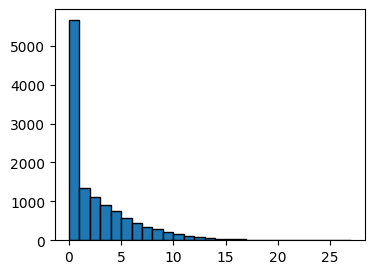

In [159]:
plt.figure(figsize=(4,3))

plt.hist(df.Administrative, edgecolor="black", bins=df.Administrative.nunique());

Около половины датасета составляют объекты, которые не открывали страницы типа Administrative.

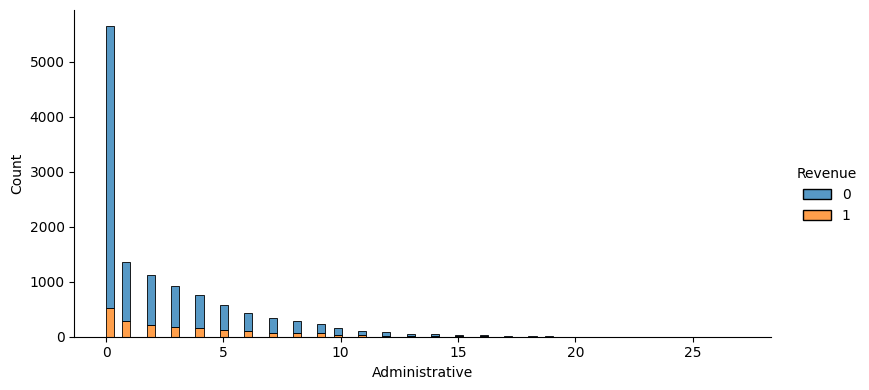

In [115]:
ax = sns.displot(df, x="Administrative", hue="Revenue", height=4, multiple="stack", aspect=2)
# sns.move_legend(ax, "center right")

Проверим наличие взаимосвязи между признаком числовым Administrative и Revenue с помощью ANOVA.

In [116]:
from scipy.stats import f_oneway

CategoryGroupLists = df.groupby('Revenue')['Administrative'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  5.678048118158767e-52
Features are correlated


Посмотрим на то, насколько часто совершались покупки после просмотра страниц типа Administrative.

In [117]:
def revenue_stats(variable):
  table = df.groupby(variable)['Revenue'].mean().to_frame().sort_values(by=variable, ascending=True)
  count = df[variable].value_counts().to_frame().sort_values(by=variable, ascending=True)
  overall= pd.concat([table, count], axis=1)
  overall.columns = ['share of Revenue', '# of occurences']
  return overall


In [118]:
revenue_stats('Administrative')

,share of Revenue,# of occurences
Administrative,,
0,0.090877,5656
1,0.214919,1354
2,0.184022,1114
3,0.190164,915
4,0.200000,765
5,0.205217,575
6,0.256944,432
7,0.195266,338
8,0.254355,287


### Administrative_Duration

Поскольку в датасете много нулевых значений в колонке Administrative, то соответственно в Administrative_Duration также ожидается столько нулевых значений. Для наглядности графика профильтруем нулевые значения.

<Axes: xlabel='Administrative_Duration', ylabel='Count'>

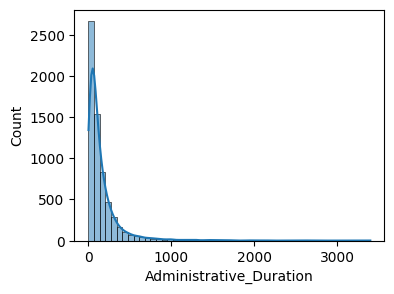

In [119]:
plt.figure(figsize=(4,3))

sns.histplot(data = df.Administrative_Duration[df.Administrative_Duration>0], kde = True, bins=50)

In [120]:
df.groupby('Revenue').agg(Adm_Mean=('Administrative_Duration', 'mean'),
                          Adm_Max=('Administrative_Duration', 'max'),
                          Adm_Min=('Administrative_Duration', 'min'),
                          Adm_std=('Administrative_Duration', 'std'))

,Adm_Mean,Adm_Max,Adm_Min,Adm_std
Revenue,,,,
0,74.541168,3398.75,0.0,171.770714
1,119.483244,2086.75,0.0,201.114732


Поскольку максимальное значение 3398.75 отстоит от среднего значения на несколько десятков стандартных отклонений, оно, возможно является выбросом. Просмотрим более внимательно объекты, у которых значения отклоняются от среднего более, чем на 7 стандартных отклонений.

In [121]:
number_of_objects_with_high_adm_dur = df[df.Administrative_Duration> df.Administrative_Duration.mean()+7*df.Administrative_Duration.std()].shape[0]
print(f'Датасет содержит {number_of_objects_with_high_adm_dur} объекта(ов) с высоким значением Administrative_Duration')
df[df.Administrative_Duration> df.Administrative_Duration.mean()+7*df.Administrative_Duration.std()]

Датасет содержит 43 объекта(ов) с высоким значением Administrative_Duration


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
257,5,1388.750000,0,0.000000,4,1373.750000,0.000000,0.020000,0.000000,0.0,Mar,1,1,7,8,Returning_Visitor,0,0
499,4,1347.750000,0,0.000000,22,3410.875000,0.019872,0.090000,0.000000,0.0,Mar,2,2,1,2,Returning_Visitor,0,0
931,4,1521.000000,2,64.000000,30,2284.687302,0.019355,0.042742,2.304323,0.0,Mar,2,2,1,1,Returning_Visitor,0,0
948,3,1373.500000,0,0.000000,43,2798.073810,0.000000,0.010971,2.915512,0.0,Mar,2,6,2,3,Returning_Visitor,0,0
1277,11,1640.590909,0,0.000000,16,1849.833333,0.000000,0.013636,10.781364,0.0,Mar,1,1,2,3,Returning_Visitor,0,0
1302,5,1417.500000,0,0.000000,36,1051.248276,0.000000,0.002293,0.000000,0.0,Mar,2,2,5,2,Returning_Visitor,1,0
1346,3,1499.571429,1,186.000000,31,2905.943651,0.000000,0.010215,0.000000,0.0,Mar,2,6,7,1,Returning_Visitor,0,0
1463,10,1559.750000,1,7.000000,41,1663.761905,0.004348,0.015942,13.634633,0.0,Mar,1,1,1,2,Returning_Visitor,0,1
1572,11,2047.234848,9,1146.666667,45,3641.213151,0.002637,0.014311,7.753880,0.0,Mar,2,2,1,2,Returning_Visitor,0,1
2446,2,1687.500000,0,0.000000,29,3098.033333,0.000000,0.025806,0.000000,0.0,May,2,4,5,3,Returning_Visitor,0,0


Обнаруживается, что данные клиенты склонны к долгому рассматриванию страниц не только типа Administrative. Поэтому не будем удалять подобные объекты с высокими значениями.

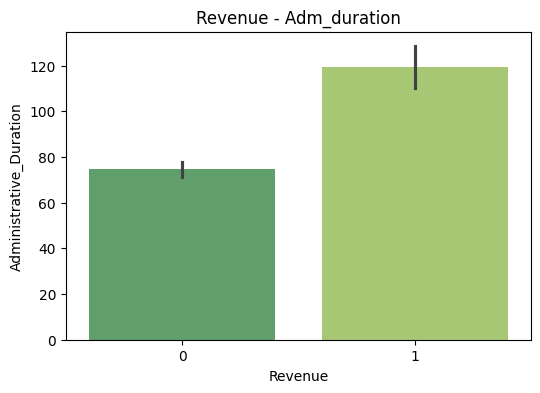

In [122]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='Administrative_Duration', data = df, palette='summer')
plt.title('Revenue - Adm_duration')
plt.show();

Вполне логично, что с увеличением времени, проведенного на сайте, увеличивается и вероятность покупки. Проведем тест ANOVA, для выявления статистической значимости данного соотношения.

In [159]:
CategoryGroupLists = df.groupby('Revenue')['Administrative_Duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  2.308477945119702e-24
Features are correlated


### Informational

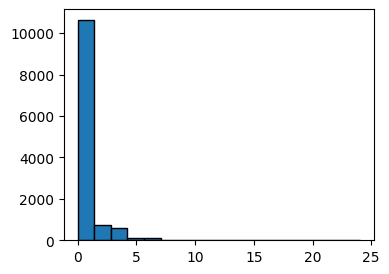

In [191]:
plt.figure(figsize=(4,3))

plt.hist(df.Informational, edgecolor="black", bins=df.Informational.nunique());

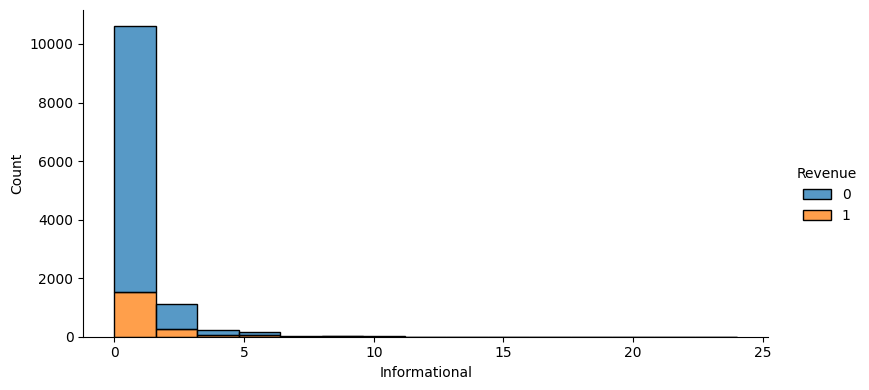

In [198]:
sns.displot(df, x="Informational", hue="Revenue", height=4, multiple="stack", aspect=2)

In [23]:
revenue_stats('Informational')

,share of Revenue,# of occurences
Informational,,
0,0.135079,9587
1,0.226705,1041
2,0.211538,728
3,0.244737,380
4,0.279279,222
5,0.313131,99
6,0.217949,78
7,0.166667,36
8,0.285714,14


Проведем ANOVA тест:

In [199]:
CategoryGroupLists = df.groupby('Revenue')['Informational'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  2.7796139200386275e-25
Features are correlated


### Informational_Duration

<Axes: xlabel='Informational_Duration', ylabel='Count'>

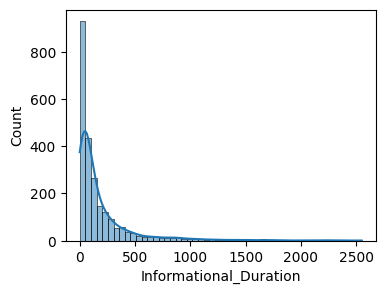

In [201]:
plt.figure(figsize=(4,3))

sns.histplot(data = df.Informational_Duration[df.Informational_Duration>0], kde = True, bins=50)

In [209]:
df.groupby('Revenue').agg(Inf_Mean=('Informational_Duration', 'mean'),
                          Inf_Max=('Informational_Duration', 'max'),
                          Inf_Min=('Informational_Duration', 'min'),
                          Inf_std=('Informational_Duration', 'std'))

,Inf_Mean,Inf_Max,Inf_Min,Inf_std
Revenue,,,,
0,30.303908,2549.375000,0.0,134.424257
1,57.028111,1767.666667,0.0,171.480655


In [223]:
number_of_objects_with_high_inf_dur = df[df.Informational_Duration> df.Informational_Duration.mean()+7*df.Informational_Duration.std()].shape[0]
print(f'Датасет содержит {number_of_objects_with_high_inf_dur} объекта(ов) с высоким значением Informational_Duration')
df[df.Informational_Duration> df.Informational_Duration.mean()+7*df.Informational_Duration.std()][:20]

Датасет содержит 56 объекта(ов) с высоким значением Informational_Duration


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
184,0,0.000000,16,1210.397619,5,279.857143,0.003175,0.012764,0.000000,0.0,Mar,2,2,1,8,Returning_Visitor,0,0
243,0,0.000000,1,1220.000000,28,2389.333333,0.016667,0.030833,0.000000,0.0,Mar,2,2,1,3,Returning_Visitor,1,0
373,1,3.000000,14,1165.166667,81,2820.952419,0.008897,0.029431,0.000000,0.0,aug,2,2,3,2,Returning_Visitor,0,0
536,0,0.000000,1,1411.000000,1,1411.000000,0.000000,0.100000,0.000000,0.0,Mar,2,2,1,2,Returning_Visitor,0,0
844,8,160.500000,2,1467.000000,26,721.000000,0.000000,0.031029,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,0,0
1572,11,2047.234848,9,1146.666667,45,3641.213151,0.002637,0.014311,7.753880,0.0,Mar,2,2,1,2,Returning_Visitor,0,1
2301,3,44.000000,4,1636.000000,49,4945.083333,0.009259,0.029444,6.165000,0.8,May,2,2,2,4,Returning_Visitor,0,1
2824,10,620.952381,5,1307.000000,131,9487.940434,0.001727,0.011632,0.761076,0.0,May,2,2,2,2,Returning_Visitor,0,0
3156,17,592.001401,4,1360.000000,157,5645.176455,0.002692,0.013850,2.917518,0.8,May,2,2,1,13,Returning_Visitor,0,0
3574,0,0.000000,9,1779.166667,12,1886.500000,0.007018,0.019298,0.000000,0.6,May,2,2,6,3,New_Visitor,0,0


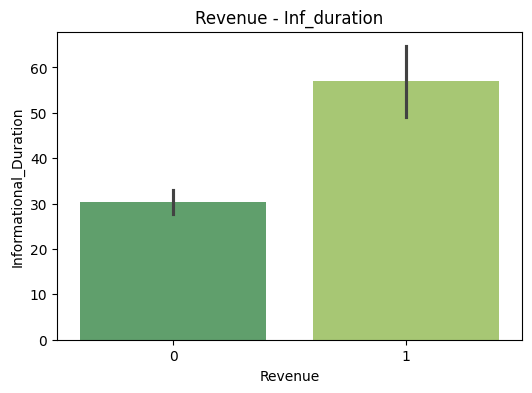

In [160]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='Informational_Duration', data = df, palette='summer')
plt.title('Revenue - Inf_duration')
plt.show();

In [161]:
CategoryGroupLists = df.groupby('Revenue')['Informational_Duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  2.8738241536768495e-14
Features are correlated


Таким образом, между длительностью посещения страниц информационного типа и покупкой товаров существует статистически значимая взаимосвязь.

### ProductRelated

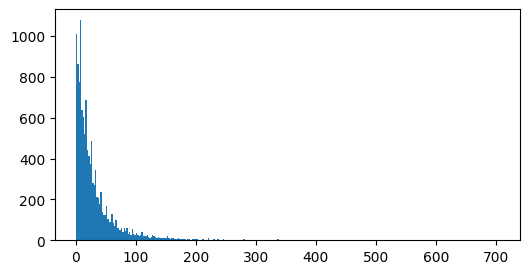

In [216]:
plt.figure(figsize=(6,3))

plt.hist(df.ProductRelated, bins=df.ProductRelated.nunique());

В отличие от распределений для Administrative и Informational, у ProductRelated намного больше посещений, так как правый хвост намного длинее. Это можно объяснить тем, что посетители целенаправленно ищут разные товары для покупки.

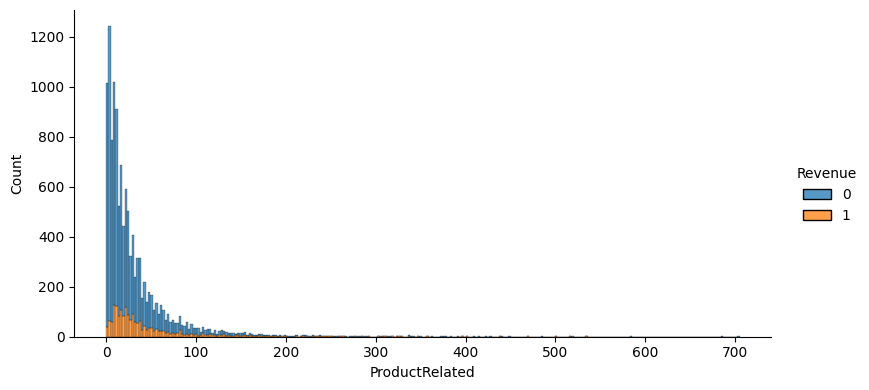

In [213]:
sns.displot(df, x="ProductRelated", hue="Revenue", height=4, multiple="stack", aspect=2)

In [218]:
table_prod = df.groupby('ProductRelated')['Revenue'].mean().to_frame().sort_values(by='ProductRelated', ascending=True)
prod_count = df.ProductRelated.value_counts().to_frame().sort_values(by='ProductRelated', ascending=True)
overall_prod = pd.concat([table_prod, prod_count], axis=1)
overall_prod.columns = ['share of Revenue', '# of occurences']
overall_prod

,share of Revenue,# of occurences
ProductRelated,,
0,0.157895,38
1,0.025194,516
2,0.043573,459
3,0.054585,458
4,0.044554,404
...,...,...
518,0.000000,1
534,1.000000,1
584,0.000000,1


In [219]:
CategoryGroupLists = df.groupby('Revenue')['ProductRelated'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  1.1233512409248828e-67
Features are correlated


Как и следовало ожидать, ANOVA показывает, что с ростом количества посещенных страниц увиличиается и доля покупок.

### ProductRelated_Duration

<Axes: xlabel='ProductRelated_Duration', ylabel='Count'>

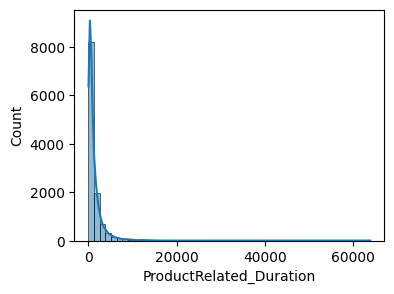

In [220]:
plt.figure(figsize=(4,3))

sns.histplot(data = df.ProductRelated_Duration[df.ProductRelated_Duration>0], kde = True, bins=50)

In [221]:
df.groupby('Revenue').agg(Prod_Mean=('ProductRelated_Duration', 'mean'),
                          Prod_Max=('ProductRelated_Duration', 'max'),
                          Prod_Min=('ProductRelated_Duration', 'min'),
                          Prod_std=('ProductRelated_Duration', 'std'))

,Prod_Mean,Prod_Max,Prod_Min,Prod_std
Revenue,,,,
0,1059.188279,63973.52223,0.0,1767.657813
1,1816.955090,27009.85943,0.0,2289.234591


Таблица выше показывает, что более долгое время, проведенное на ProductRelated страницах приводит к покупкам.

In [224]:
number_of_objects_with_high_prod_dur = df[df.ProductRelated_Duration> df.ProductRelated_Duration.mean()+7*df.ProductRelated_Duration.std()].shape[0]
print(f'Датасет содержит {number_of_objects_with_high_prod_dur} объекта(ов) с высоким значением ProductRelated_Duration')
df[df.ProductRelated_Duration> df.ProductRelated_Duration.mean()+7*df.ProductRelated_Duration.std()][:20]

Датасет содержит 20 объекта(ов) с высоким значением ProductRelated_Duration


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5152,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,1,0
6165,10,2407.423810,3,434.300000,486,23050.10414,0.000324,0.011249,0.000000,0.0,Jul,2,2,1,3,Returning_Visitor,0,0
6278,5,39.800000,2,239.800000,216,14577.08498,0.002740,0.013369,0.888486,0.0,Aug,2,2,3,13,Returning_Visitor,0,0
6322,8,296.860000,8,179.500000,157,16093.30941,0.007903,0.027247,2.051882,0.0,June,2,2,1,5,Returning_Visitor,1,0
6684,20,199.456273,7,299.033333,686,23342.08205,0.009853,0.022771,0.150650,0.0,Aug,2,2,1,1,Returning_Visitor,0,0
7662,10,1251.200000,7,250.000000,414,23888.81000,0.009900,0.027062,1.033757,0.0,Sep,2,2,4,13,Returning_Visitor,0,0
7900,11,383.300000,2,256.300000,189,15454.43857,0.007286,0.019883,0.000000,0.0,Aug,2,10,2,1,Returning_Visitor,0,0
8071,5,3398.750000,6,2549.375000,449,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,0,0
8230,7,82.766667,1,47.000000,391,15025.23302,0.001515,0.010141,1.271407,0.0,Nov,2,2,1,1,Returning_Visitor,0,0
8308,27,853.735949,2,126.500000,584,24844.15620,0.002099,0.009347,4.511100,0.0,Nov,2,4,3,8,Returning_Visitor,0,0


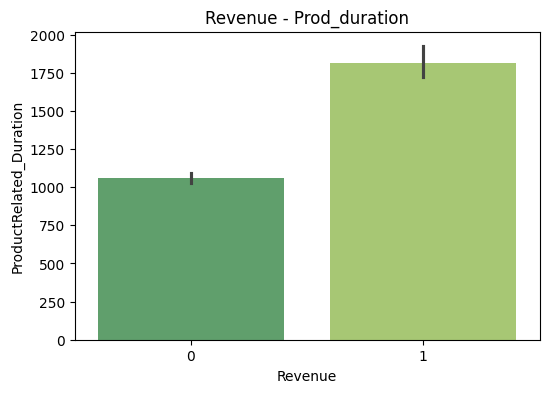

In [222]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='summer')
plt.title('Revenue - Prod_duration')
plt.show();

In [225]:
CategoryGroupLists = df.groupby('Revenue')['ProductRelated_Duration'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  1.6304823229795064e-59
Features are correlated


Как и следовало ожидать, существует статистически значимая взаимосвязь между временем, проведенным на сайте типа ProductRelated и покупкой товаров.

## BounceRates

<Axes: xlabel='BounceRates', ylabel='Count'>

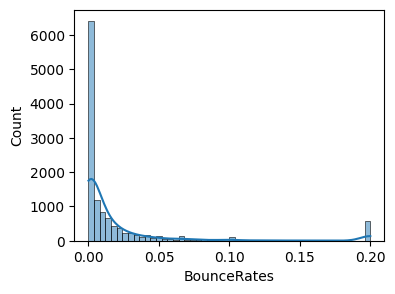

In [228]:
plt.figure(figsize=(4,3))

sns.histplot(data = df.BounceRates, kde = True, bins=50)

In [8]:
df.groupby('Revenue').agg(Bounce_Mean=('BounceRates', 'mean'),
                                                      Bounce_Max=('BounceRates', 'max'),
                                                      Bounce_Min=('BounceRates', 'min'),
                                                      Bounce_std=('BounceRates', 'std'))

,Bounce_Mean,Bounce_Max,Bounce_Min,Bounce_std
Revenue,,,,
0,0.023420,0.2,0.0,0.048841
1,0.005117,0.2,0.0,0.012185


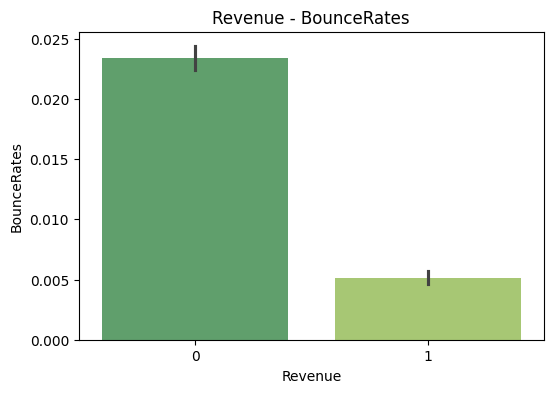

In [229]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='BounceRates', data = df, palette='summer')
plt.title('Revenue - BounceRates')
plt.show();

In [230]:
CategoryGroupLists = df.groupby('Revenue')['BounceRates'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  6.192114546926349e-59
Features are correlated


Вполне логично, что высокий BounceRate приводит к менее частым покупкам на сайте. По определению так и должно происходить.

## ExitRates

<Axes: xlabel='ExitRates', ylabel='Count'>

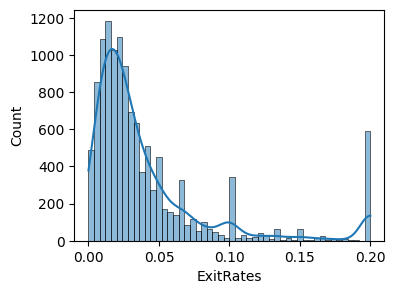

In [231]:
plt.figure(figsize=(4,3))

sns.histplot(data = df.ExitRates, kde = True, bins=50)

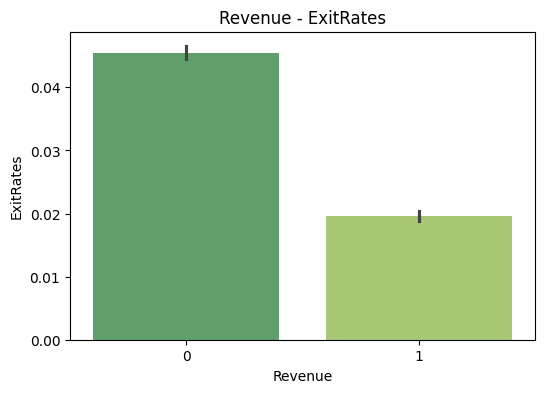

In [232]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='ExitRates', data = df, palette='summer')
plt.title('Revenue - ExitRates')
plt.show();

In [233]:
CategoryGroupLists = df.groupby('Revenue')['ExitRates'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  4.3432035855689244e-114
Features are correlated


## PageValues

<Axes: xlabel='PageValues', ylabel='Count'>

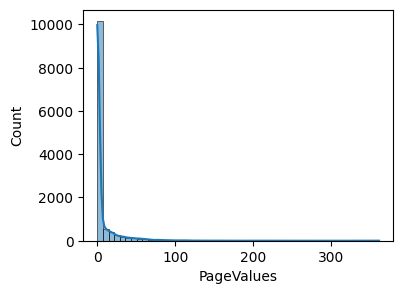

In [236]:
plt.figure(figsize=(4,3))

sns.histplot(data = df.PageValues, kde = True, bins=50)

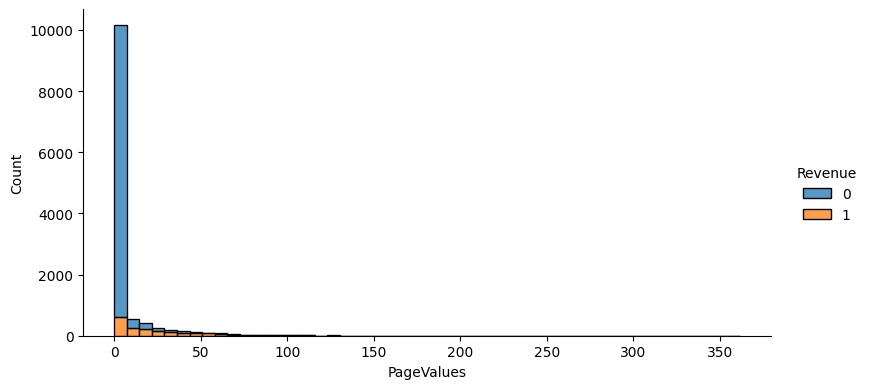

In [10]:
sns.displot(df, x="PageValues", hue="Revenue", height=4, multiple="stack", aspect=2, bins=50)

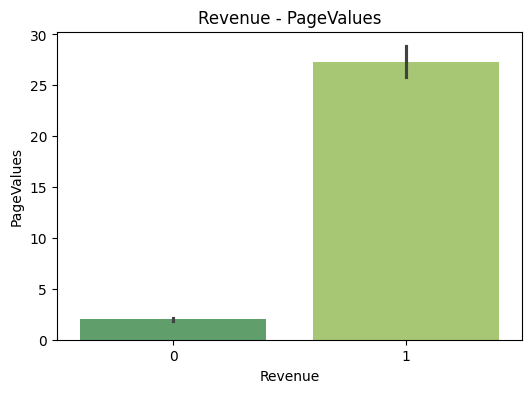

In [238]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='PageValues', data = df, palette='summer')
plt.title('Revenue - PageValues')
plt.show();

In [239]:
CategoryGroupLists = df.groupby('Revenue')['PageValues'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  0.0
Features are correlated


## SpecialDay

<Axes: xlabel='SpecialDay', ylabel='Count'>

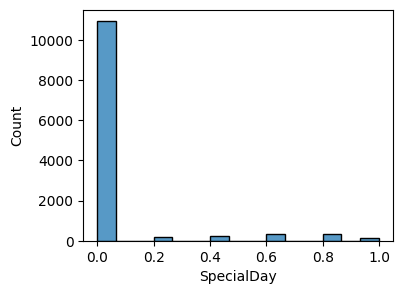

In [15]:
plt.figure(figsize=(4,3))

sns.histplot(data = df.SpecialDay)


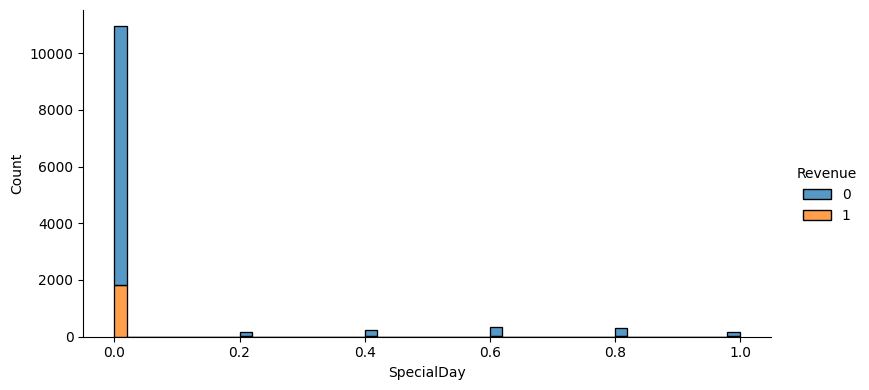

In [16]:
sns.displot(df, x="SpecialDay", hue="Revenue", height=4, multiple="stack", aspect=2, bins=50)

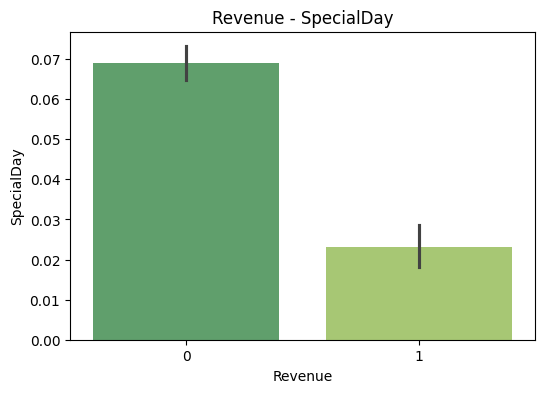

In [17]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='SpecialDay', data = df, palette='summer')
plt.title('Revenue - SpecialDay')
plt.show();

График показывает: чем ближе праздник (то есть чем меньше показатель SpecialDay), тем вероятнее покупка.

In [18]:
CategoryGroupLists = df.groupby('Revenue')['SpecialDay'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

print('\nP-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')


P-Value for Anova is:  2.489381331575667e-20
Features are correlated


In [162]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


Посчитаем V-меру Крамера сразу для всех категориальных признаков.

In [163]:
import association_metrics as am

df_cat = df[['Month', 'OperatingSystems',	'Browser', 'Region', 'TrafficType',	'VisitorType',	'Weekend', 'Revenue']].apply(lambda x: x.astype("category"))

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,1.000000,0.062714,0.066578,0.046890,0.190134,0.137319,0.065240,0.175886
OperatingSystems,0.062714,1.000000,0.594710,0.114588,0.191448,0.453635,0.119947,0.078446
Browser,0.066578,0.594710,1.000000,0.125785,0.189172,0.504214,0.087649,0.048879
Region,0.046890,0.114588,0.125785,1.000000,0.085420,0.174014,0.029907,0.028127
TrafficType,0.190134,0.191448,0.189172,0.085420,1.000000,0.375818,0.150902,0.171856
VisitorType,0.137319,0.453635,0.504214,0.174014,0.375818,1.000000,0.053501,0.103638
Weekend,0.065240,0.119947,0.087649,0.029907,0.150902,0.053501,1.000000,0.027802
Revenue,0.175886,0.078446,0.048879,0.028127,0.171856,0.103638,0.027802,1.000000


## Month

In [164]:
df.Month.unique()

array(['Feb', 'aug', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov',
       'Sep', 'Dec'], dtype=object)

Можно заметить, что встречается разное обозначение для августа: Aug и aug. Приведем к единому виду Aug.

In [165]:
df.Month = df.Month.apply(lambda x: x.capitalize())
df.Month.unique()

array(['Feb', 'Aug', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Nov', 'Sep',
       'Dec'], dtype=object)

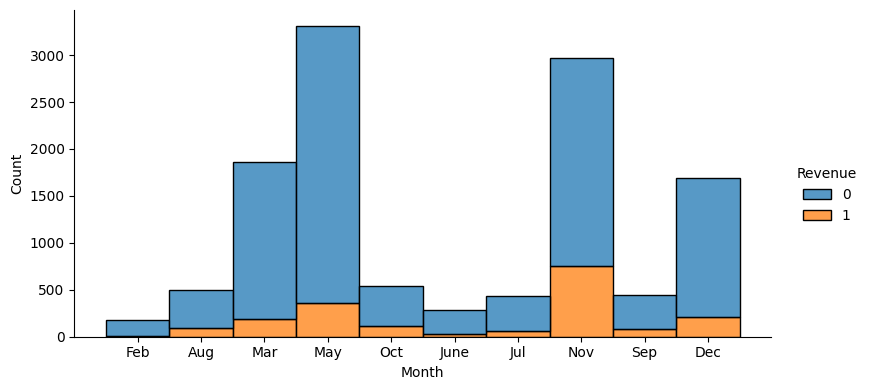

In [43]:
sns.displot(df, x="Month", hue="Revenue", height=4, multiple="stack", aspect=2)

## OperatingSystems

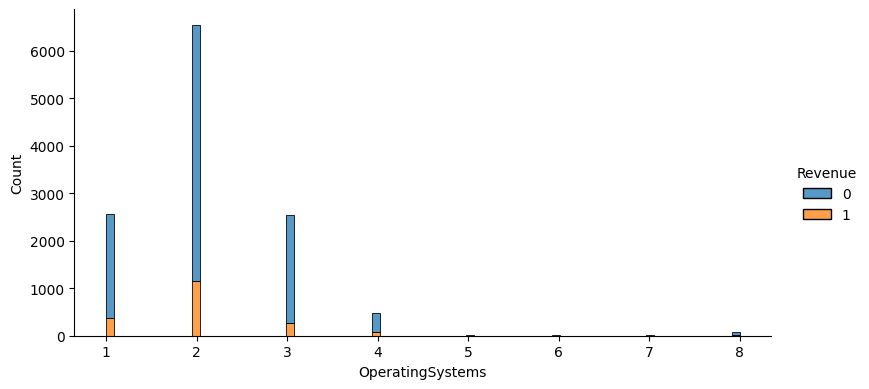

In [10]:
sns.displot(df, x="OperatingSystems", hue="Revenue", height=4, multiple="stack", aspect=2)

## Browser

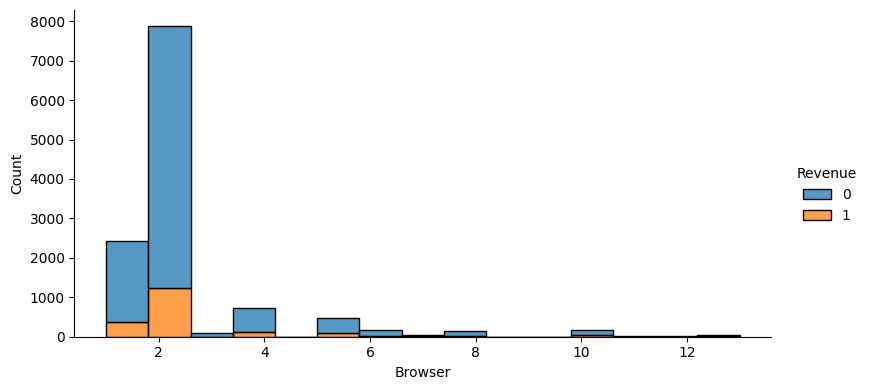

In [12]:
sns.displot(df, x="Browser", hue="Revenue", height=4, multiple="stack", aspect=2)

Пользователи используют преимущественно два браузера, на которые приходится свыше 10 тыс. объектов, т.е. больше 80%.

In [24]:
revenue_stats('Browser')

,share of Revenue,# of occurences
Browser,,
1,0.150021,2433
2,0.155026,7889
3,0.047619,105
4,0.177596,732
5,0.184946,465
6,0.114943,174
7,0.122449,49
8,0.155556,135
9,0.000000,1


## Region

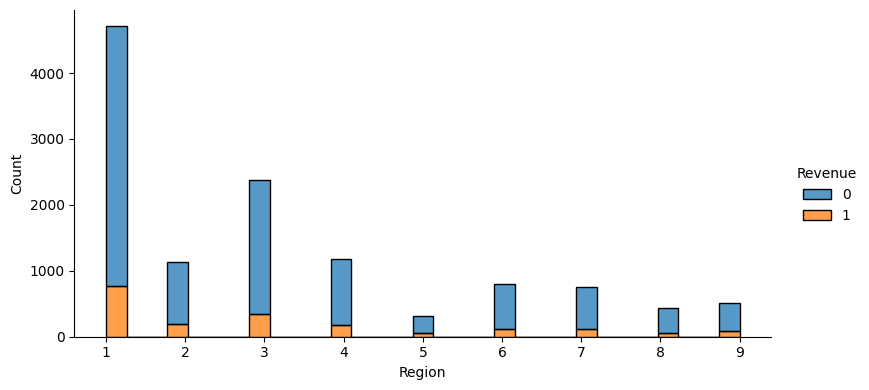

In [15]:
sns.displot(df, x="Region", hue="Revenue", height=4, multiple="stack", aspect=2)

Регионы, как и браузеры, распределены неравномерно.

## TrafficType

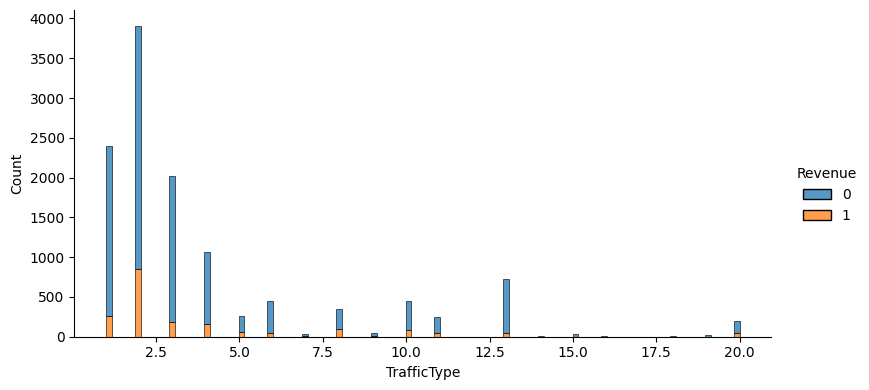

In [19]:
sns.displot(df, x="TrafficType", hue="Revenue", height=4, multiple="stack", aspect=2)


## VisitorType

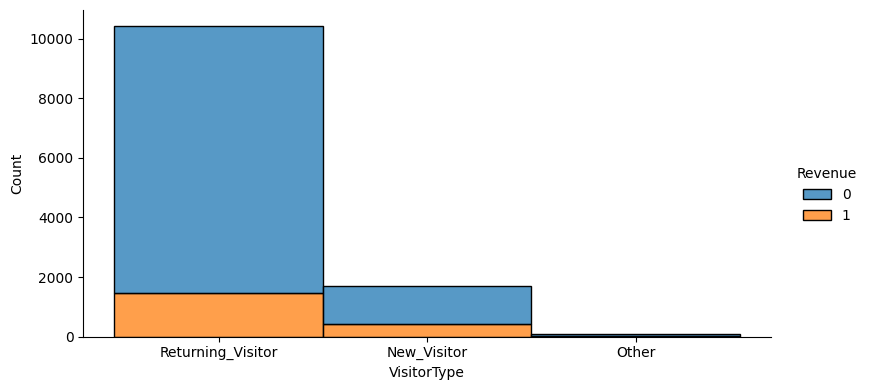

In [20]:
sns.displot(df, x="VisitorType", hue="Revenue", height=4, multiple="stack", aspect=2)


In [21]:
revenue_stats('VisitorType')

,share of Revenue,# of occurences
VisitorType,,
New_Visitor,0.249262,1693
Other,0.197531,81
Returning_Visitor,0.140751,10444


## Weekend

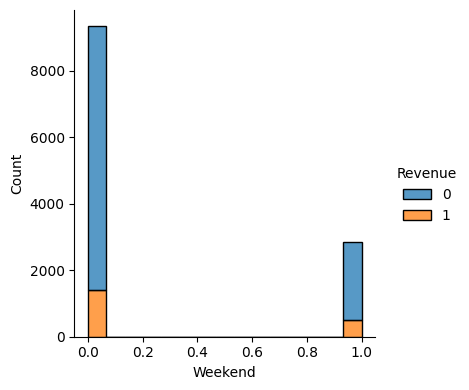

In [27]:
sns.displot(df, x="Weekend", hue="Revenue", height=4, multiple="stack", aspect=1)


In [29]:
revenue_stats('Weekend')

,share of Revenue,# of occurences
Weekend,,
0,0.150582,9357
1,0.174415,2861


День недели не имеет взаимосвязи со статистикой покупок. Несмотря на то, что в будние дни сайт посещают в целом в 3,5 раза чаще, чем на выходных, думается, что обусловлено тем, что в неделе пять будних дней, а выходных всего два.  

# **Задание 3**

Вычислим матрицу корреляций для **числовых признаков**, используя корреляцию Кендалла.

In [31]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<Axes: >

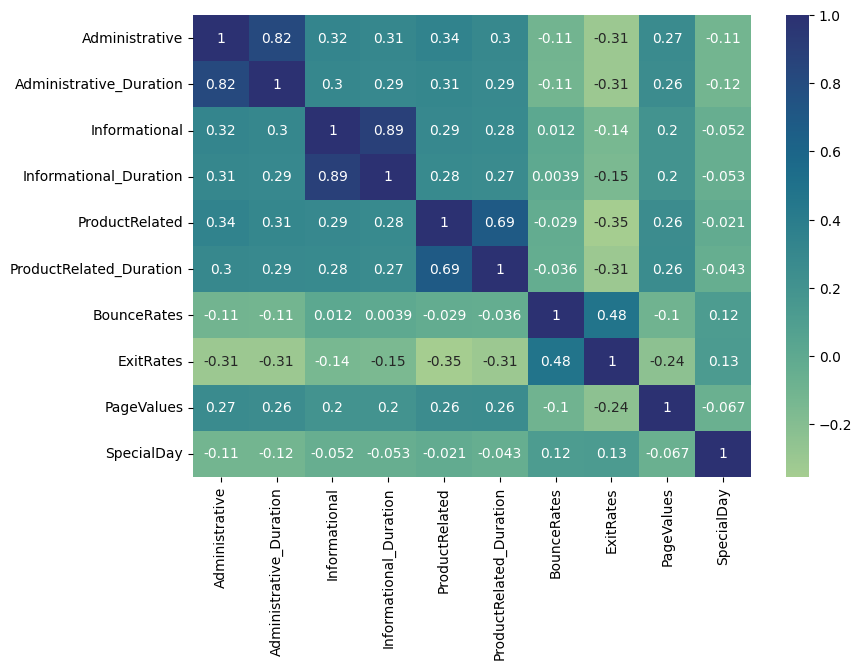

In [166]:
numeric_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

corr = df[numeric_columns].corr(method='kendall', numeric_only=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, cmap='crest', annot=True)

Корреляции Спирмана по модулю немного выше корреляций Кендалла.

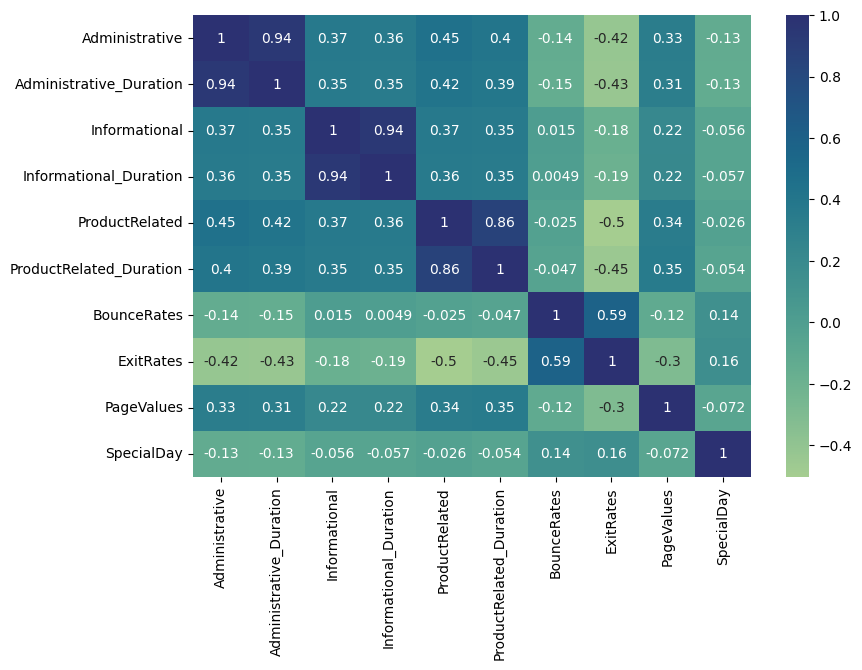

In [167]:
corr = df[numeric_columns].corr(method='spearman', numeric_only=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, cmap="crest", annot=True);

Посмотрим на взаимосвязь между **категориальными признаками.**

In [168]:
cat_columns = ['Month', 'OperatingSystems', 'Browser', 'Region',
               'TrafficType', 'VisitorType',
              'Weekend', 'Revenue']

df_cat = df[cat_columns].apply(lambda x: x.astype("category"))

cramersv = am.CramersV(df_cat)
cramersv.fit()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,1.000000,0.061816,0.069385,0.045575,0.199300,0.137127,0.064739,0.175381
OperatingSystems,0.061816,1.000000,0.594710,0.114588,0.191448,0.453635,0.119947,0.078446
Browser,0.069385,0.594710,1.000000,0.125785,0.189172,0.504214,0.087649,0.048879
Region,0.045575,0.114588,0.125785,1.000000,0.085420,0.174014,0.029907,0.028127
TrafficType,0.199300,0.191448,0.189172,0.085420,1.000000,0.375818,0.150902,0.171856
VisitorType,0.137127,0.453635,0.504214,0.174014,0.375818,1.000000,0.053501,0.103638
Weekend,0.064739,0.119947,0.087649,0.029907,0.150902,0.053501,1.000000,0.027802
Revenue,0.175381,0.078446,0.048879,0.028127,0.171856,0.103638,0.027802,1.000000


Посмотрим на взаимосвязь между **категориальными и числовыми признаками** с помощью V-меры Крамера.

In [176]:
df_num = df[numeric_columns]

Data = []

for c1 in df_num.columns:
    for c2 in df_cat.columns:
        CategoryGroupLists = df.groupby(c2)[c1].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        if AnovaResults[1] >= 0.05:
            Data.append({'Category' : c2, 'Numerical' : c1, 'Is correlated' : 'No'})
        else:
            Data.append({'Category' : c2, 'Numerical' : c1, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)

print(f'Количество пар признаков, которые имеют статистически значимую корреляцию составляет:')
print(AnovaRes[AnovaRes['Is correlated'] == 'Yes'].shape[0])

Количество пар признаков, которые имеют статистически значимую корреляцию составляет:
66


# **Задание 4**

Рассмотрим распределение целевой переменной Revenue, которая имеет категориальный характер.

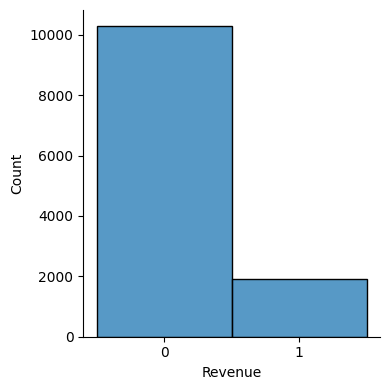

In [61]:
df['Revenue'] = df['Revenue'].apply(lambda x: str(x))
sns.displot(df, x="Revenue", height=4, aspect=1)

In [65]:
df.Revenue.value_counts(normalize=True)

,proportion
Revenue,
0,0.843837
1,0.156163


Таким образом, датасет несбалансированный в отношении целевой переменной, что ожидаемо. Покупки совершаются в 15.6% случаев.

Для решения задачи бинарной классификации можно применить логистическую регрессию. В случае разбалансировки классов модель может прогнозировать класс наибольшего объема (в нашем случае с Revenue равным 0), и тогда метрика accuracy будет равна 0.84, что может ввести в заблуждение. Поэтому в качестве метрик нужно использовать f1_score, ROC-AUC.

# **Задание 5**

In [123]:
df_big = df.copy()

for i in range(100):
  df_big = pd.concat([df_big, df])

df_big.to_csv("big_dataset.csv", index=False)

In [124]:
df_big.shape, df.shape

((1234018, 18), (12218, 18))

In [125]:
!pip install polars

import polars as pl

print(pl.__version__)

1.9.0


## Загрузка данных

Проведем небольшой эксперимент, чтобы определить, существует ли статистически значимое отличие между скоростью работы polars и pandas.

In [126]:
def measure_time(numbers, module):
  data = []
  for _ in range(numbers):
    start = time.perf_counter()
    df_new = module.read_csv("big_dataset.csv")
    end = time.perf_counter()
    data.append(end-start)
  return data

In [127]:
numbers = 10

time_pandas = measure_time(numbers, pd)
time_polars = measure_time(numbers, pl)

t_stat, p_value = stats.ttest_ind(time_pandas, time_polars)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 7.99022532889989, P-value: 2.4937545556999494e-07


Если p-value ниже 0.05, можно сказать, что между pandas и polars существует значимое отличие в отношении скорости загрузки данных.

**При numbers, начиная с 5 и выше, t-test всегда показывает низкие значения p-value, что указывает на более высокую скорость загрузки данных polars по отношению к pandas.**

## Фильтрация данных

In [128]:
df_pl = pl.read_csv("big_dataset.csv")
df = pd.read_csv("big_dataset.csv")

In [129]:
def filter_time(numbers):

  data_pd = []
  data_pl = []

  for _ in range(numbers):

    start = time.perf_counter()
    df_new_pd = df[(df.Informational > 0.1) & (df.PageValues > 30)]
    end = time.perf_counter()
    data_pd.append(end-start)

    start = time.perf_counter()
    df_new_pl = df_pl.filter((pl.col('Informational') > 0.1) & (pl.col('PageValues') > 30))
    end = time.perf_counter()
    data_pl.append(end-start)

  return data_pd, data_pl


In [130]:
number = 10

time_pandas_filter, time_polars_filter = filter_time(number)

t_stat, p_value = stats.ttest_ind(time_pandas_filter, time_polars_filter)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -5.760062088513565, P-value: 1.8489814003728235e-05


Поскольку процесс фильтрации происходит очень быстро, то на нашем датасете размером чуть более 1 мил. строк необходимо повторять сравнение более 10 раз, чтобы получить стабильную оценку p-value.

Определим значения p-value для разных значений numbers и построим график.

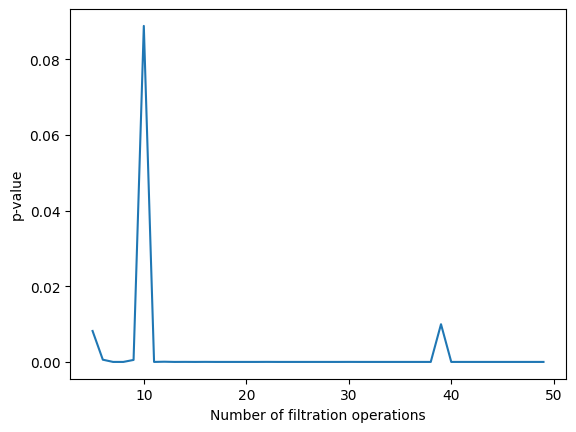

In [131]:
i_s = []
p_values = []

for i in range(5, 50):

  time_pandas_filter, time_polars_filter = filter_time(i)
  t_stat, p_value = stats.ttest_ind(time_pandas_filter, time_polars_filter)

  i_s.append(i)
  p_values.append(p_value)


sns.lineplot(x=i_s,y=p_values)

plt.xlabel("Number of filtration operations")
plt.ylabel("p-value")

plt.show()

**Таким образом, обычно polars быстрее фильтрует данные, чем pandas.**

## Агрегация данных

In [145]:
%%time

df.groupby(['Month', 'Region']).agg({'Informational_Duration' : 'mean', 'ExitRates' : 'max'})

CPU times: user 119 ms, sys: 0 ns, total: 119 ms
Wall time: 117 ms


Informational_Duration  ExitRates
Month Region                                   
Aug   1                    21.128153   0.200000
      2                    38.885294   0.200000
      3                    52.216487   0.200000
      4                    38.737674   0.186667
      5                    27.757576   0.100000
...                              ...        ...
aug   4                    67.180556   0.200000
      5                    23.750000   0.024324
      6                   144.247619   0.075000
      7                    20.500000   0.015385
      9                     0.000000   0.037500

[98 rows x 2 columns]

In [144]:
%%time

df_pl.group_by(['Month', 'Region']).agg([pl.mean('Informational_Duration'), pl.max('ExitRates')])

CPU times: user 174 ms, sys: 170 ms, total: 345 ms
Wall time: 279 ms


Month,Region,Informational_Duration,ExitRates
str,i64,f64,f64
"""Jul""",4,93.031783,0.2
"""Mar""",6,19.689449,0.2
"""Aug""",1,21.128153,0.2
"""Mar""",4,27.472039,0.2
"""Oct""",4,72.820652,0.133333
…,…,…,…
"""June""",4,16.262424,0.2
"""Jul""",9,19.19,0.2
"""aug""",1,45.647727,0.2


**Что касается агрегации, кажется, что pandas работает быстрее, чем polars.**